In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


In [2]:
data=pd.read_csv(r"F:\playing\colorectal_cancer_dataset.csv")
data.head()


,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [7]:
data.shape

(167497, 28)

In [15]:
data.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


<Axes: >

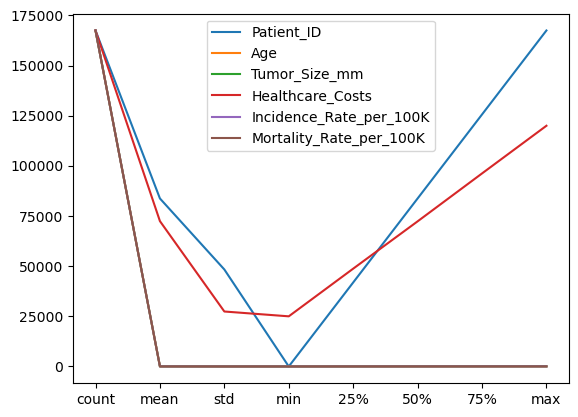

In [14]:
data.describe().plot()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [17]:
data.isnull().sum()

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

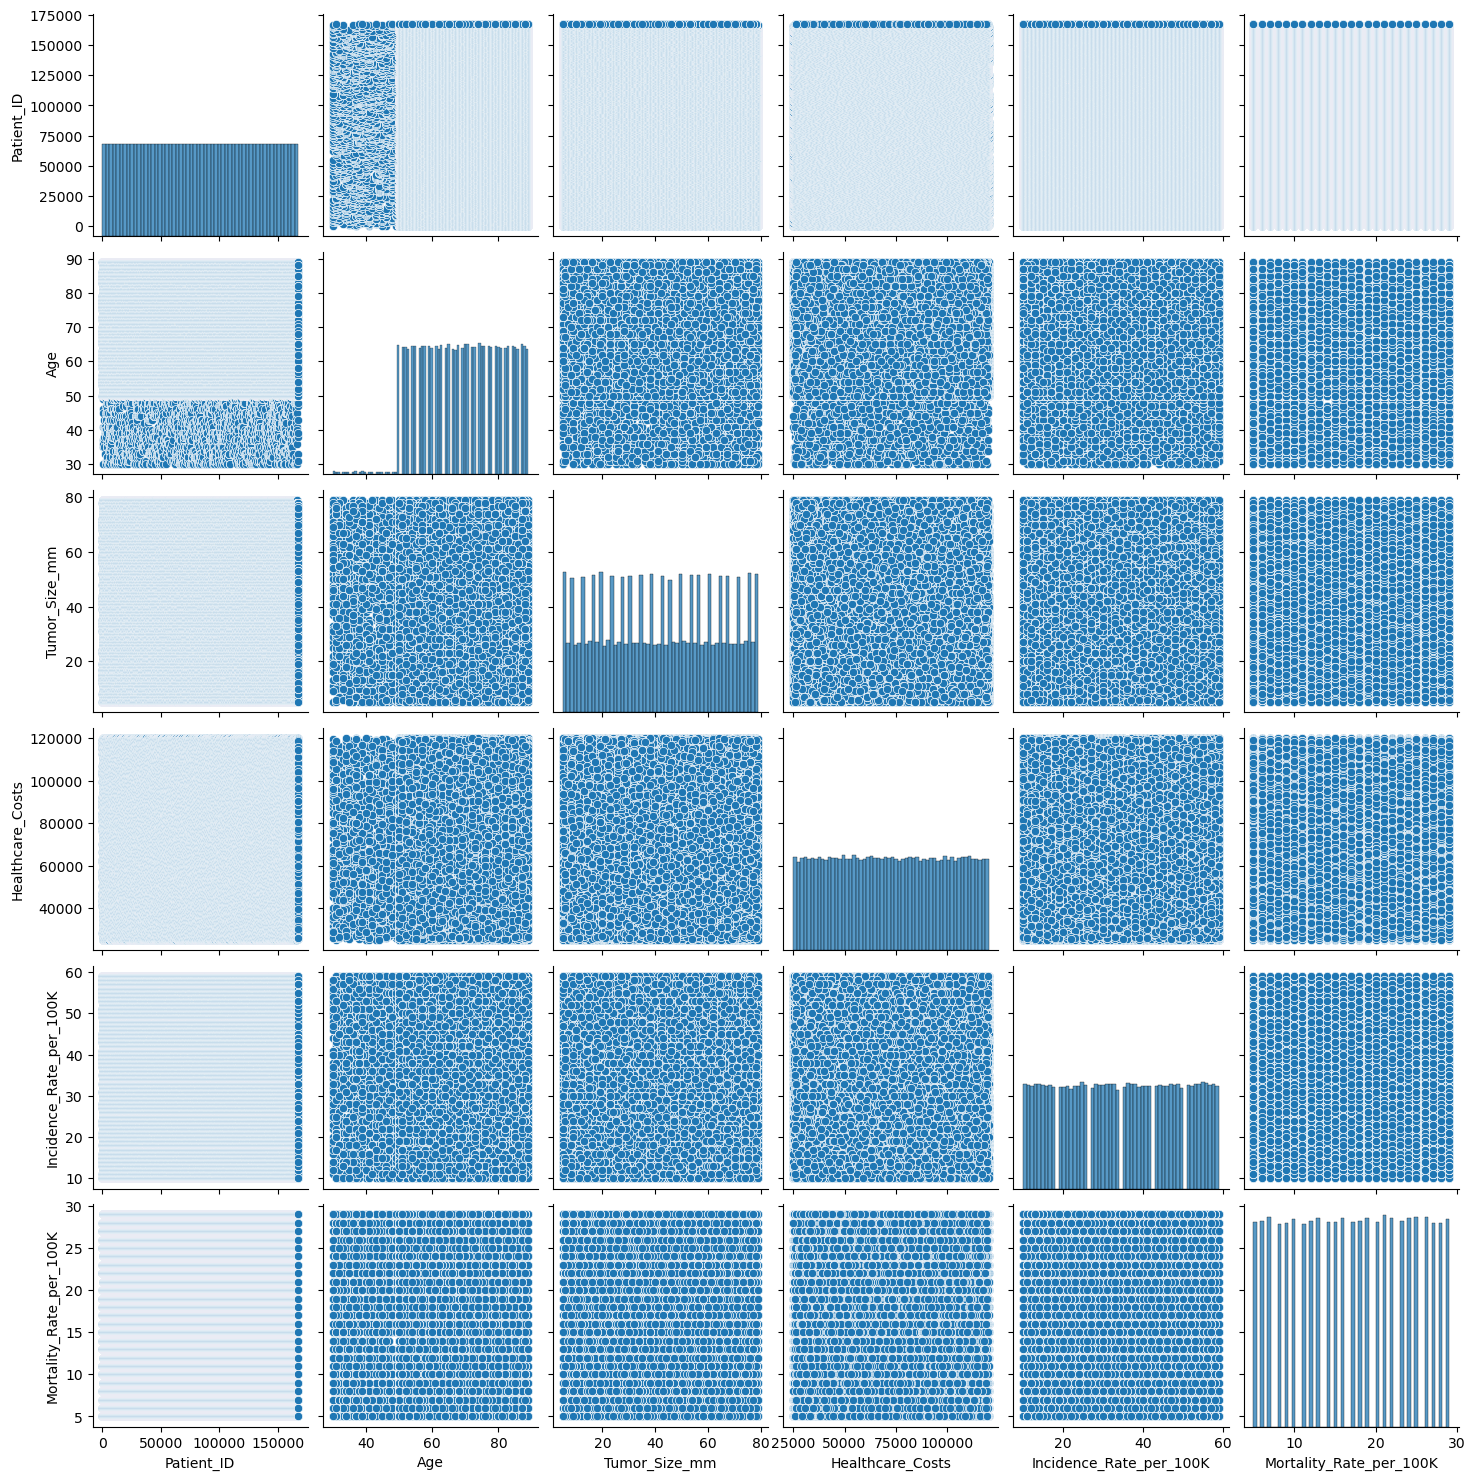

In [18]:
sns.pairplot(data)

In [20]:
data.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

In [3]:
data['Country'].unique()

array(['UK', 'Japan', 'USA', 'France', 'Canada', 'Germany', 'China',
       'South Korea', 'Brazil', 'Italy', 'India', 'Pakistan',
       'New Zealand', 'South Africa', 'Australia', 'Nigeria'],
      dtype=object)

<Axes: ylabel='Country'>

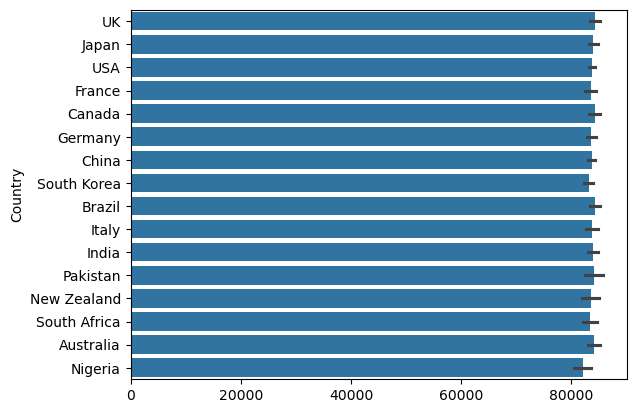

In [4]:
sns.barplot(data["Country"])

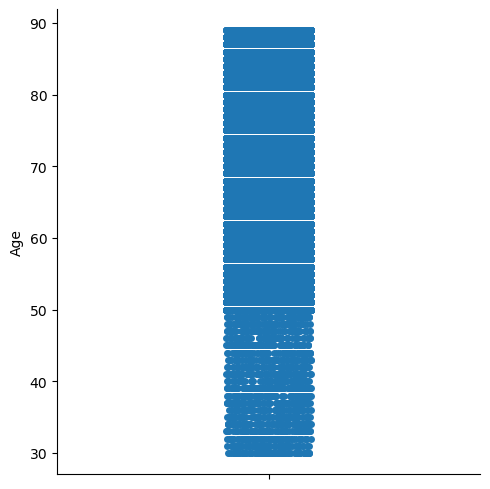

In [8]:
sns.catplot(data['Age'])

In [6]:
data["Mortality"].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
data["Economic_Classification"].unique()

array(['Developed', 'Developing'], dtype=object)

In [3]:
data=data.iloc[:,1:]

In [4]:
data.columns

Index(['Country', 'Age', 'Gender', 'Cancer_Stage', 'Tumor_Size_mm',
       'Family_History', 'Smoking_History', 'Alcohol_Consumption',
       'Obesity_BMI', 'Diet_Risk', 'Physical_Activity', 'Diabetes',
       'Inflammatory_Bowel_Disease', 'Genetic_Mutation', 'Screening_History',
       'Early_Detection', 'Treatment_Type', 'Survival_5_years', 'Mortality',
       'Healthcare_Costs', 'Incidence_Rate_per_100K',
       'Mortality_Rate_per_100K', 'Urban_or_Rural', 'Economic_Classification',
       'Healthcare_Access', 'Insurance_Status', 'Survival_Prediction'],
      dtype='object')

In [5]:
data=pd.get_dummies(data, columns=['Urban_or_Rural', 'Economic_Classification'], drop_first=True)
data=pd.get_dummies(data, columns=['Country', 'Gender', 'Cancer_Stage','Family_History', 
       'Healthcare_Access', 'Insurance_Status'], drop_first=True)
data=pd.get_dummies(data, columns=['Smoking_History', 'Alcohol_Consumption',
       'Obesity_BMI', 'Diet_Risk', 'Physical_Activity', 'Diabetes',
       'Inflammatory_Bowel_Disease'], drop_first=True)
data=pd.get_dummies(data, columns=['Genetic_Mutation', 'Screening_History',
       'Early_Detection'], drop_first=True)
data=pd.get_dummies(data, columns=['Treatment_Type'], drop_first=True)
data=pd.get_dummies(data, columns=['Survival_5_years', 'Mortality'], drop_first=True)



In [6]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Survival_Prediction']=label.fit_transform(data['Survival_Prediction'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 49 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Age                                 167497 non-null  int64
 1   Tumor_Size_mm                       167497 non-null  int64
 2   Healthcare_Costs                    167497 non-null  int64
 3   Incidence_Rate_per_100K             167497 non-null  int64
 4   Mortality_Rate_per_100K             167497 non-null  int64
 5   Survival_Prediction                 167497 non-null  int32
 6   Urban_or_Rural_Urban                167497 non-null  bool 
 7   Economic_Classification_Developing  167497 non-null  bool 
 8   Country_Brazil                      167497 non-null  bool 
 9   Country_Canada                      167497 non-null  bool 
 10  Country_China                       167497 non-null  bool 
 11  Country_France                      167497 non-null 

In [8]:
data.columns

Index(['Age', 'Tumor_Size_mm', 'Healthcare_Costs', 'Incidence_Rate_per_100K',
       'Mortality_Rate_per_100K', 'Survival_Prediction',
       'Urban_or_Rural_Urban', 'Economic_Classification_Developing',
       'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Japan',
       'Country_New Zealand', 'Country_Nigeria', 'Country_Pakistan',
       'Country_South Africa', 'Country_South Korea', 'Country_UK',
       'Country_USA', 'Gender_M', 'Cancer_Stage_Metastatic',
       'Cancer_Stage_Regional', 'Family_History_Yes', 'Healthcare_Access_Low',
       'Healthcare_Access_Moderate', 'Insurance_Status_Uninsured',
       'Smoking_History_Yes', 'Alcohol_Consumption_Yes', 'Obesity_BMI_Obese',
       'Obesity_BMI_Overweight', 'Diet_Risk_Low', 'Diet_Risk_Moderate',
       'Physical_Activity_Low', 'Physical_Activity_Moderate', 'Diabetes_Yes',
       'Inflammatory_Bowel_Disease_Yes', 'Genetic_Mutation_Yes',
    

In [ ]:
# scaler=StandardScaler()
# data=scaler.fit_transform(data)

In [ ]:
# data=pd.DataFrame(data)

In [11]:
da=['Age', 'Tumor_Size_mm', 'Healthcare_Costs', 'Incidence_Rate_per_100K',
       'Mortality_Rate_per_100K',
       'Urban_or_Rural_Urban', 'Economic_Classification_Developing',
       'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Japan',
       'Country_New Zealand', 'Country_Nigeria', 'Country_Pakistan',
       'Country_South Africa', 'Country_South Korea', 'Country_UK',
       'Country_USA', 'Gender_M', 'Cancer_Stage_Metastatic',
       'Cancer_Stage_Regional', 'Family_History_Yes', 'Healthcare_Access_Low',
       'Healthcare_Access_Moderate', 'Insurance_Status_Uninsured',
       'Smoking_History_Yes', 'Alcohol_Consumption_Yes', 'Obesity_BMI_Obese',
       'Obesity_BMI_Overweight', 'Diet_Risk_Low', 'Diet_Risk_Moderate',
       'Physical_Activity_Low', 'Physical_Activity_Moderate', 'Diabetes_Yes',
       'Inflammatory_Bowel_Disease_Yes', 'Genetic_Mutation_Yes',
       'Screening_History_Never', 'Screening_History_Regular',
       'Early_Detection_Yes', 'Treatment_Type_Combination',
       'Treatment_Type_Radiotherapy', 'Treatment_Type_Surgery',
       'Survival_5_years_Yes', 'Mortality_Yes', 'Survival_Prediction']
data=data[da]

In [12]:
data.head()

,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural_Urban,Economic_Classification_Developing,Country_Brazil,Country_Canada,Country_China,...,Genetic_Mutation_Yes,Screening_History_Never,Screening_History_Regular,Early_Detection_Yes,Treatment_Type_Combination,Treatment_Type_Radiotherapy,Treatment_Type_Surgery,Survival_5_years_Yes,Mortality_Yes,Survival_Prediction
0,77,69,54413,50,5,True,False,False,False,False,...,False,False,True,True,True,False,False,True,False,1
1,59,33,76553,37,25,True,True,False,False,False,...,False,False,True,False,False,False,False,True,False,1
2,66,17,62805,54,27,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,0
3,83,14,89393,45,11,True,False,False,False,False,...,False,False,True,False,False,False,True,True,False,1
4,66,34,66425,15,27,True,True,False,False,False,...,False,True,False,True,False,False,True,True,False,1


In [13]:
data.shape

(167497, 49)

In [14]:
X=data.iloc[:,:-1]
print("X shape is",X.shape)

y=data.iloc[:,-1]
print("y shape is",y.shape)

X shape is (167497, 48)
y shape is (167497,)


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
print("X_trian shape ",X_train.shape)
print("X_test shape ",X_test.shape)
print("y_trian shape ",y_train.shape)
print("y_test shape ",y_test.shape)





X_trian shape  (133997, 48)
X_test shape  (33500, 48)
y_trian shape  (133997,)
y_test shape  (33500,)


In [ ]:

linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_pred=linear_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
linear_model.score(X_test,y_test)

Mean Squared Error for Linear Regression: 0.2400514983279754
[-1.49519945e-04 -6.38533327e-05 -5.62418235e-08  3.97578453e-06
  5.23903429e-05  3.92065907e-03 -1.72979196e-03 -1.32369015e-02
 -6.27068328e-03 -9.86042769e-03 -2.41015676e-02 -1.90274899e-02
 -1.20460963e-02 -3.07313357e-02 -9.69860880e-03 -1.71376165e-02
 -9.65357739e-03 -2.83413006e-02 -1.85820404e-02 -1.21801556e-02
 -1.14459593e-02 -1.24401613e-02 -1.64948422e-03 -2.77973054e-03
 -1.39425470e-03  1.28573795e-03 -4.28331115e-03 -1.31295420e-03
  4.36953038e-03 -1.00275033e-03  1.61384882e-03 -3.64221981e-03
 -3.89915220e-04 -7.32756684e-03 -8.26019248e-04  3.73295230e-03
  3.14555533e-03  9.46426816e-04 -5.74019739e-03  1.35418717e-03
  2.58651131e-05 -1.06411862e-03  4.14109059e-03 -6.78795808e-03
 -1.52642657e-02 -6.84286171e-03  1.50979665e-03  1.50447613e-04]
0.6323515816841576


Text(0.5, 0, 'Actual Values')

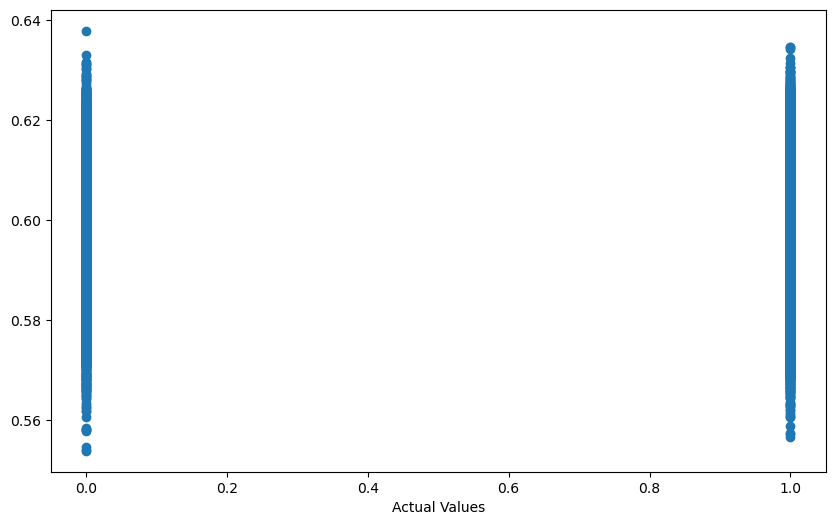

In [24]:
print("Mean Squared Error for Linear Regression:", mse)
print(linear_model.coef_)
print(linear_model.intercept_)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")

Mean Squared Error for Decision Tree: 0.48734328358208956
[1.04131052e-01 1.16711021e-01 1.63113945e-01 9.21368759e-02
 8.54568984e-02 1.42690470e-02 1.47693950e-02 6.83952325e-03
 7.33838338e-03 7.38170224e-03 1.02529122e-03 7.56235765e-03
 6.91430788e-03 6.59269674e-05 8.18996814e-03 2.88306156e-03
 3.06944297e-03 3.10356123e-03 5.07996263e-03 8.84667260e-03
 7.40678914e-03 1.16479330e-02 1.61638487e-02 1.39398475e-02
 1.38038515e-02 1.33506824e-02 1.22866245e-02 1.51767139e-02
 7.08792891e-03 1.45351154e-02 1.62759753e-02 1.46503412e-02
 1.30888326e-02 1.31162916e-02 1.39749228e-02 3.53245577e-03
 1.07569611e-02 1.36041710e-02 9.98534593e-03 1.30451445e-02
 9.34837886e-03 1.44226200e-02 1.50727469e-02 1.09213061e-02
 6.17695893e-04 1.32988820e-02 1.43606905e-02 1.56395069e-02]
51


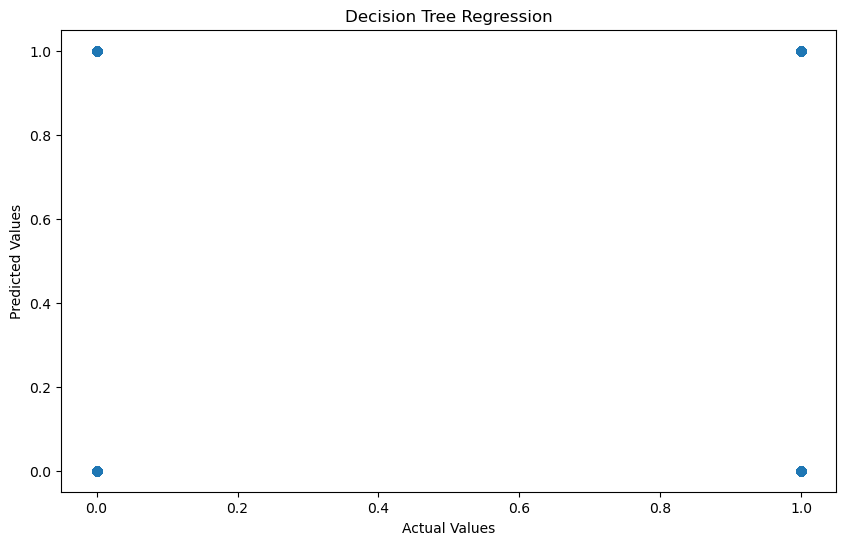

In [26]:
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train) 
y_pred_tree=tree_model.predict(X_test)
mse_tree=mean_squared_error(y_test,y_pred_tree)
print("Mean Squared Error for Decision Tree:", mse_tree)
print(tree_model.feature_importances_)
print(tree_model.get_depth())
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression")
plt.show()

Mean Squared Error for Random Forest: 0.24341366268656714
[0.09594572 0.10669223 0.15341287 0.09972909 0.0849245  0.01240869
 0.01365094 0.00878127 0.00730221 0.01038752 0.00731287 0.00876132
 0.00842816 0.00478702 0.00957032 0.00431911 0.00453921 0.00426446
 0.00590593 0.0096353  0.00920353 0.01151554 0.01425406 0.01157045
 0.01312489 0.0135529  0.01082973 0.01302331 0.01244725 0.01418458
 0.01424724 0.01193393 0.01232837 0.00936922 0.01273679 0.01170801
 0.01239096 0.01229838 0.00994642 0.01174282 0.01154763 0.01305656
 0.01284488 0.01109747 0.00743096 0.01290658 0.01395255 0.01399625]


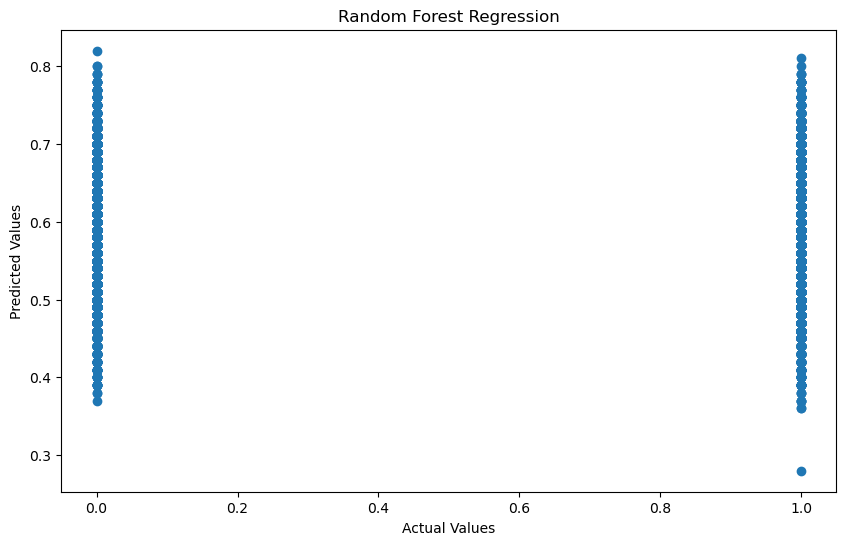

In [27]:
random_model=RandomForestRegressor()
random_model.fit(X_train,y_train)
y_pred_random=random_model.predict(X_test)
mse_random=mean_squared_error(y_test,y_pred_random)
print("Mean Squared Error for Random Forest:", mse_random)
print(random_model.feature_importances_)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_random)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression")
plt.show()

In [30]:
random_model.score(X_test,y_test)

-0.014324582601941804